In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sqlite3
import sys
import logging
import pickle

# Data
from sklearn.model_selection import train_test_split

# Tensorflow
import tensorflow as tf

# Graph
import tensorflow_gnn as tfgnn

# Add the project root to the Python path
#sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))
from scripts.data_cleaner import filter_top_cpv_categories
from scripts.gnn_anomaly_detection import ProcurementGraphBuilder, GNNAnomalyDetector, AnomalyAnalyzer

from scripts.preprocess_pipeline import create_pipeline_cat


%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [28]:
graph_builder = ProcurementGraphBuilder()

data_path = os.path.join(os.path.dirname(os.getcwd()), 'data')

df = graph_builder.load_data(data_path)

X_train_preproc, X_val_preproc, X_test_preproc, X_train, X_val, X_test = graph_builder.preprocess_data(df)

X_train_graph = graph_builder.create_graph(X_train_preproc, X_train, type='train')
X_val_graph = graph_builder.create_graph(X_val_preproc, X_val, type='val')
X_test_graph = graph_builder.create_graph(X_test_preproc, X_test, type='test')

INFO:scripts.gnn_anomaly_detection:Loading data from /home/ronan/code/RonanB400/Project/decp_ml/data


INFO:scripts.gnn_anomaly_detection:Preprocessing data...


Filtered from 392 to 60 CPV categories, keeping 250895 rows out of 286850


/home/ronan/.pyenv/versions/3.10.6/envs/decp_ml_env/lib/python3.10/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
/home/ronan/.pyenv/versions/3.10.6/envs/decp_ml_env/lib/python3.10/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
INFO:scripts.gnn_anomaly_detection:Creating graph structure from preprocessed data...
INFO:scripts.gnn_anomaly_detection:Filtered to 160572 valid contracts (removed 0 contracts with missing names)
INFO:scripts.gnn_anomaly_detection:Creating edges and edge features from preprocessed data...
INFO:scripts.gnn_anomaly_de

In [29]:
data_path = os.path.join(os.path.dirname(os.getcwd()), 'data')


# Load a pickle file
with open(os.path.join(data_path, 'graph_data_train.pkl'), 'rb') as f:
    X_train_graph = pickle.load(f)

with open(os.path.join(data_path, 'graph_data_val.pkl'), 'rb') as f:
    X_val_graph = pickle.load(f)

with open(os.path.join(data_path, 'graph_data_test.pkl'), 'rb') as f:
    X_test_graph = pickle.load(f)
    
gnn_detector = GNNAnomalyDetector(hidden_dim=64, output_dim=32, num_layers=3)

# Train graph
node_features_train = X_train_graph['node_features']
edge_features_train = X_train_graph['edge_features']

X_train_tf_graph = gnn_detector.create_tensorflow_graph(X_train_graph, node_features_train, edge_features_train)
gnn_detector.graph_tensor_train = X_train_tf_graph

# Val graph
node_features_val = X_val_graph['node_features']
edge_features_val = X_val_graph['edge_features']

X_val_tf_graph = gnn_detector.create_tensorflow_graph(X_val_graph, node_features_val, edge_features_val)
gnn_detector.graph_tensor_val = X_val_tf_graph

# Test graph
node_features_test = X_test_graph['node_features']
edge_features_test = X_test_graph['edge_features']

X_test_tf_graph = gnn_detector.create_tensorflow_graph(X_test_graph, node_features_test, edge_features_test)
gnn_detector.graph_tensor_test = X_test_tf_graph


INFO:scripts.gnn_anomaly_detection:Creating TensorFlow GNN graph...
INFO:scripts.gnn_anomaly_detection:Creating TensorFlow GNN graph...
INFO:scripts.gnn_anomaly_detection:Creating TensorFlow GNN graph...


INFO:scripts.gnn_anomaly_detection:Building GNN model with node and edge anomaly detection...


INFO:scripts.gnn_anomaly_detection:Training GNN model for 100 epochs...


Epoch 1/100
1/1 [==============================] - 13s 13s/step - loss: 4.7279 - edge_embeddings_loss: 0.3927 - edge_reconstructed_loss: 0.5605 - node_embeddings_loss: 0.0032 - node_reconstructed_loss: 7.0277 - val_loss: 0.8185 - val_edge_embeddings_loss: 0.1302 - val_edge_reconstructed_loss: 0.1485 - val_node_embeddings_loss: 0.1530 - val_node_reconstructed_loss: 1.1804
Epoch 2/100
1/1 [==============================] - 1s 957ms/step - loss: 4.6549 - edge_embeddings_loss: 0.3923 - edge_reconstructed_loss: 0.5273 - node_embeddings_loss: 0.0033 - node_reconstructed_loss: 6.9281 - val_loss: 0.8110 - val_edge_embeddings_loss: 0.1307 - val_edge_reconstructed_loss: 0.1444 - val_node_embeddings_loss: 0.0951 - val_node_reconstructed_loss: 1.1748
Epoch 3/100
1/1 [==============================] - 1s 915ms/step - loss: 4.5987 - edge_embeddings_loss: 0.3919 - edge_reconstructed_loss: 0.4961 - node_embeddings_loss: 0.0030 - node_reconstructed_loss: 6.8538 - val_loss: 0.8067 - val_edge_embeddings_

/home/ronan/.pyenv/versions/3.10.6/envs/decp_ml_env/lib/python3.10/site-packages/tensorflow/python/saved_model/nested_structure_coder.py:458: UserWarning: Encoding a StructuredValue with type tensorflow_gnn.GraphTensorSpec; loading this StructuredValue will require that this type be imported and registered.
  warnings.warn("Encoding a StructuredValue with type %s; loading this "
/home/ronan/.pyenv/versions/3.10.6/envs/decp_ml_env/lib/python3.10/site-packages/tensorflow/python/saved_model/nested_structure_coder.py:458: UserWarning: Encoding a StructuredValue with type tensorflow_gnn.ContextSpec.v2; loading this StructuredValue will require that this type be imported and registered.
  warnings.warn("Encoding a StructuredValue with type %s; loading this "
/home/ronan/.pyenv/versions/3.10.6/envs/decp_ml_env/lib/python3.10/site-packages/tensorflow/python/saved_model/nested_structure_coder.py:458: UserWarning: Encoding a StructuredValue with type tensorflow_gnn.NodeSetSpec; loading this Stru

INFO:tensorflow:Assets written to: /home/ronan/code/RonanB400/Project/decp_ml/data/gnn_anomaly_model/assets


INFO:tensorflow:Assets written to: /home/ronan/code/RonanB400/Project/decp_ml/data/gnn_anomaly_model/assets
INFO:scripts.gnn_anomaly_detection:Model saved to /home/ronan/code/RonanB400/Project/decp_ml/data/gnn_anomaly_model


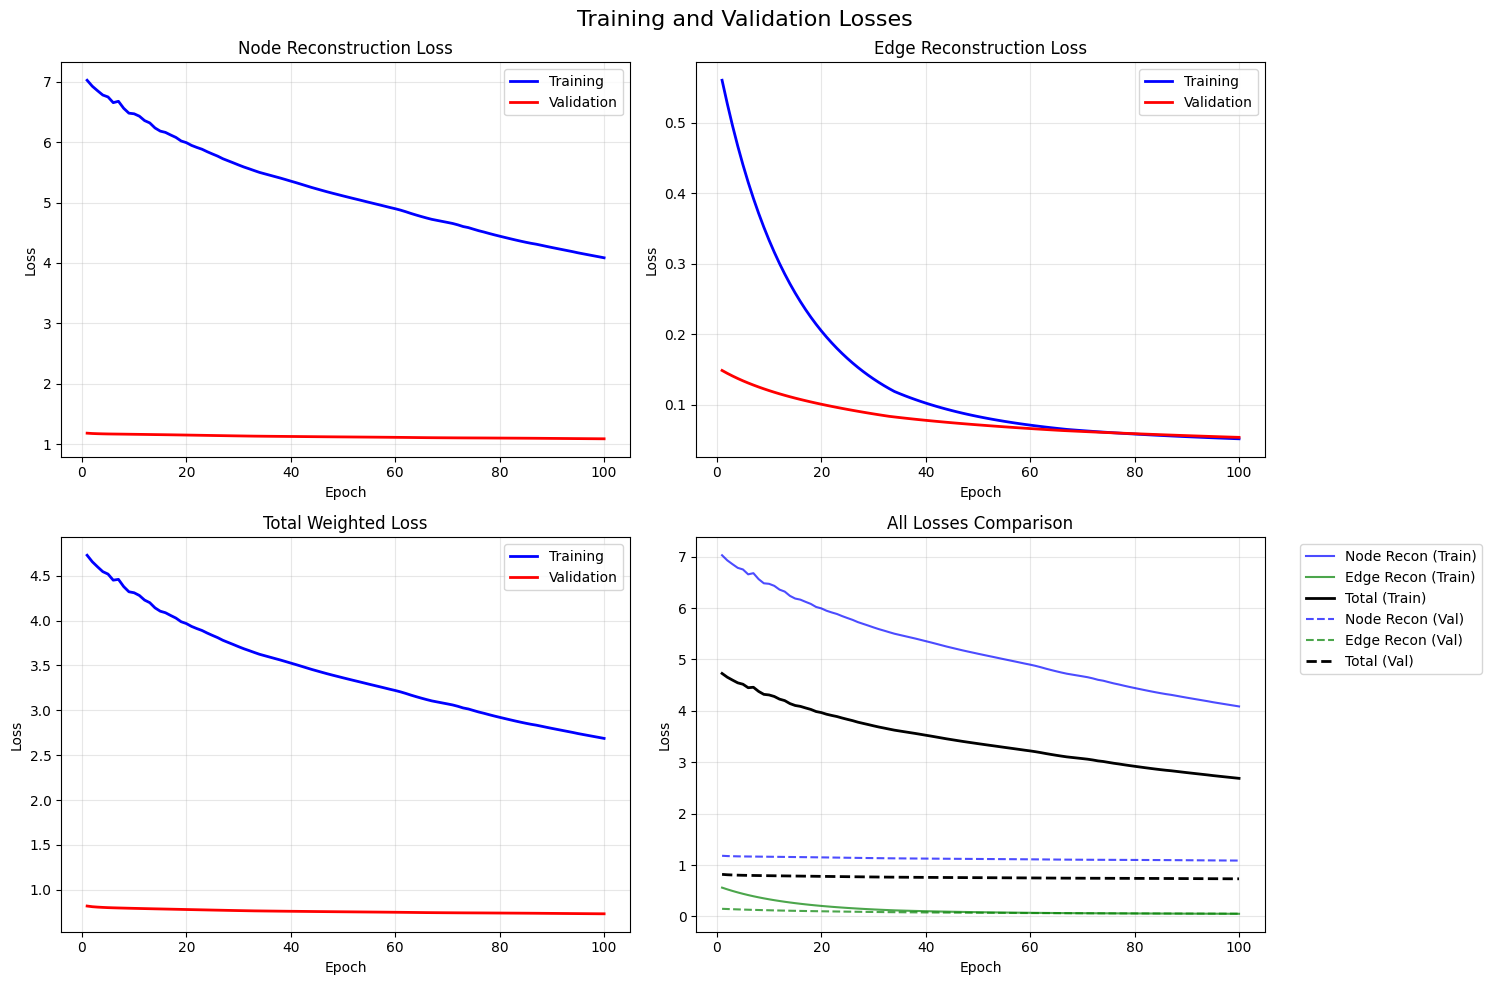


FINAL LOSS VALUES
Training Losses (Final Epoch):
  - Node Reconstruction: 4.086279
  - Edge Reconstruction: 0.051483
  - Total Weighted Loss: 2.686841

Validation Losses (Final Epoch):
  - Node Reconstruction: 1.087250
  - Edge Reconstruction: 0.053539
  - Total Weighted Loss: 0.732109

Training vs Validation Analysis:
  - Train-Val Loss Difference: 1.954732
  - ⚠️  Training loss >> Validation loss
      Likely causes: Dropout/regularization effects, data differences
      This is NOT overfitting - model performs better on validation!


In [30]:
gnn_detector.model = gnn_detector.build_model(X_train_graph['node_features'].shape[1], X_train_graph['edge_features'].shape[1],
                                              l2_regularization=0, dropout_rate=0)
history = gnn_detector.train(X_train_tf_graph, X_val_tf_graph, epochs=100)
gnn_detector.plot_training_history(history)

In [9]:

(node_reconstruction_error, edge_reconstruction_error, 
     node_threshold, edge_threshold) = gnn_detector.detect_anomalies()
    
# Calculate anomaly masks
node_anomalies = node_reconstruction_error > node_threshold
edge_anomalies = edge_reconstruction_error > edge_threshold

INFO:scripts.gnn_anomaly_detection:Detecting node and edge anomalies...


graph_tensor is self.graph_tensor_test
1/1 [==============================] - 0s 92ms/step


INFO:scripts.gnn_anomaly_detection:Detected 352 node anomalies (1.0%)
INFO:scripts.gnn_anomaly_detection:Detected 502 edge anomalies (1.0%)


In [12]:
 #Create results analysis
graph_data = X_test_graph

analyzer = AnomalyAnalyzer()

node_results_df = analyzer.create_node_results_dataframe(
    graph_data, node_reconstruction_error, node_anomalies)

node_results_df.head()

,entity_name,entity_type,node_reconstruction_error,is_node_anomaly,num_contracts,num_partners,contracts_per_partner,mean_feature_value,std_feature_value
128,26310012500016,Buyer,3672.006836,True,612.0,363.0,1.685950,0.096900,0.233282
86,22590001801244,Buyer,1161.103149,True,362.0,263.0,1.376426,0.119255,0.237588
74,21690123100011,Buyer,1157.516602,True,334.0,297.0,1.124579,0.100884,0.223250
159,20005480700017,Buyer,768.138611,True,299.0,241.0,1.240664,0.119134,0.239127
429,20005226400013,Buyer,484.078827,True,265.0,191.0,1.387435,0.115066,0.264518


In [14]:
edge_results_df = analyzer.create_edge_results_dataframe(
    graph_data, edge_reconstruction_error, edge_anomalies)

edge_results_df.head()

INFO:scripts.gnn_anomaly_detection:Optional column 'dateNotification' not found in contract_data, using None


,contract_id,edge_reconstruction_error,is_edge_anomaly,acheteur_id,titulaire_id,montant,codeCPV_3,procedure,dateNotification,log_amount,cpv_hash,procedure_hash,duration_months
47252,138157,0.207620,True,21950306700015,78924532100029,1070350.0,71300000,Procédure adaptée,None,6.697244,1.122369,-2.466460,0.0
45932,68595,0.207620,True,21950306700015,31290872600093,1070350.0,71300000,Procédure adaptée,None,6.697244,1.122369,-2.466460,0.0
45687,96609,0.207620,True,21950306700015,43906618400037,1070350.0,71300000,Procédure adaptée,None,6.697244,1.122369,-2.466460,0.0
5677,262210,0.197431,True,13002682600011,39841012600039,12490225.0,33600000,Appel d'offres ouvert,None,6.807647,2.871962,0.239156,0.0
49361,181225,0.170901,True,20006340200016,48336329700027,3425157.0,71200000,Procédure adaptée,None,6.209105,1.950652,0.960029,1.0


In [16]:
data_path

'/home/ronan/code/RonanB400/Project/decp_ml/data'

In [20]:
model_path = os.path.join(data_path, 'gnn_anomaly_model.keras')

tf.saved_model.save(gnn_detector.model, model_path)

/home/ronan/.pyenv/versions/3.10.6/envs/decp_ml_env/lib/python3.10/site-packages/tensorflow/python/saved_model/nested_structure_coder.py:458: UserWarning: Encoding a StructuredValue with type tensorflow_gnn.GraphTensorSpec; loading this StructuredValue will require that this type be imported and registered.
  warnings.warn("Encoding a StructuredValue with type %s; loading this "
/home/ronan/.pyenv/versions/3.10.6/envs/decp_ml_env/lib/python3.10/site-packages/tensorflow/python/saved_model/nested_structure_coder.py:458: UserWarning: Encoding a StructuredValue with type tensorflow_gnn.ContextSpec.v2; loading this StructuredValue will require that this type be imported and registered.
  warnings.warn("Encoding a StructuredValue with type %s; loading this "
/home/ronan/.pyenv/versions/3.10.6/envs/decp_ml_env/lib/python3.10/site-packages/tensorflow/python/saved_model/nested_structure_coder.py:458: UserWarning: Encoding a StructuredValue with type tensorflow_gnn.NodeSetSpec; loading this Stru

INFO:tensorflow:Assets written to: /home/ronan/code/RonanB400/Project/decp_ml/data/gnn_anomaly_model.keras/assets


INFO:tensorflow:Assets written to: /home/ronan/code/RonanB400/Project/decp_ml/data/gnn_anomaly_model.keras/assets


In [22]:
graph_builder = ProcurementGraphBuilder()
graph_builder.visualize_procurement_graph(X_train_graph)

KeyboardInterrupt: 